In [46]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.readwrite import json_graph

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
data = pd.read_csv('sp21_student_kaggle.csv')
data
# data['Name']
# data['Kaggle']

,Name,Kaggle,Weight
0,"Urm, Jae Jung",https://www.kaggle.com/mczielinski/bitcoin-his...,30
1,"Urm, Jae Jung",https://www.kaggle.com/allen-institute-for-ai/...,15
2,"Urm, Jae Jung",https://www.kaggle.com/datasnaek/youtube-new,25
3,"Urm, Jae Jung",https://www.kaggle.com/sudalairajkumar/novel-c...,15
4,"Urm, Jae Jung",https://www.kaggle.com/bappekim/air-pollution-...,15
...,...,...,...
275,"Kim, Yeonsoo",https://www.kaggle.com/berkeleyearth/climate-c...,30
276,"Kim, Yeonsoo",https://www.kaggle.com/washingtongold/wildfire...,25
277,"Kim, Yeonsoo",https://www.kaggle.com/robikscube/hourly-energ...,25
278,"Kim, Yeonsoo",https://www.kaggle.com/imdevskp/corona-virus-r...,15


In [48]:
# unidirected bipartite graph

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(data['Name'], bipartite='Person')
B.add_nodes_from(data['Kaggle'], bipartite='Dataset')

#B.nodes(data=True)

B.add_weighted_edges_from(
    [(row['Name'], row['Kaggle'], 1) for idx, row in data.iterrows()], 
    weight='weight')

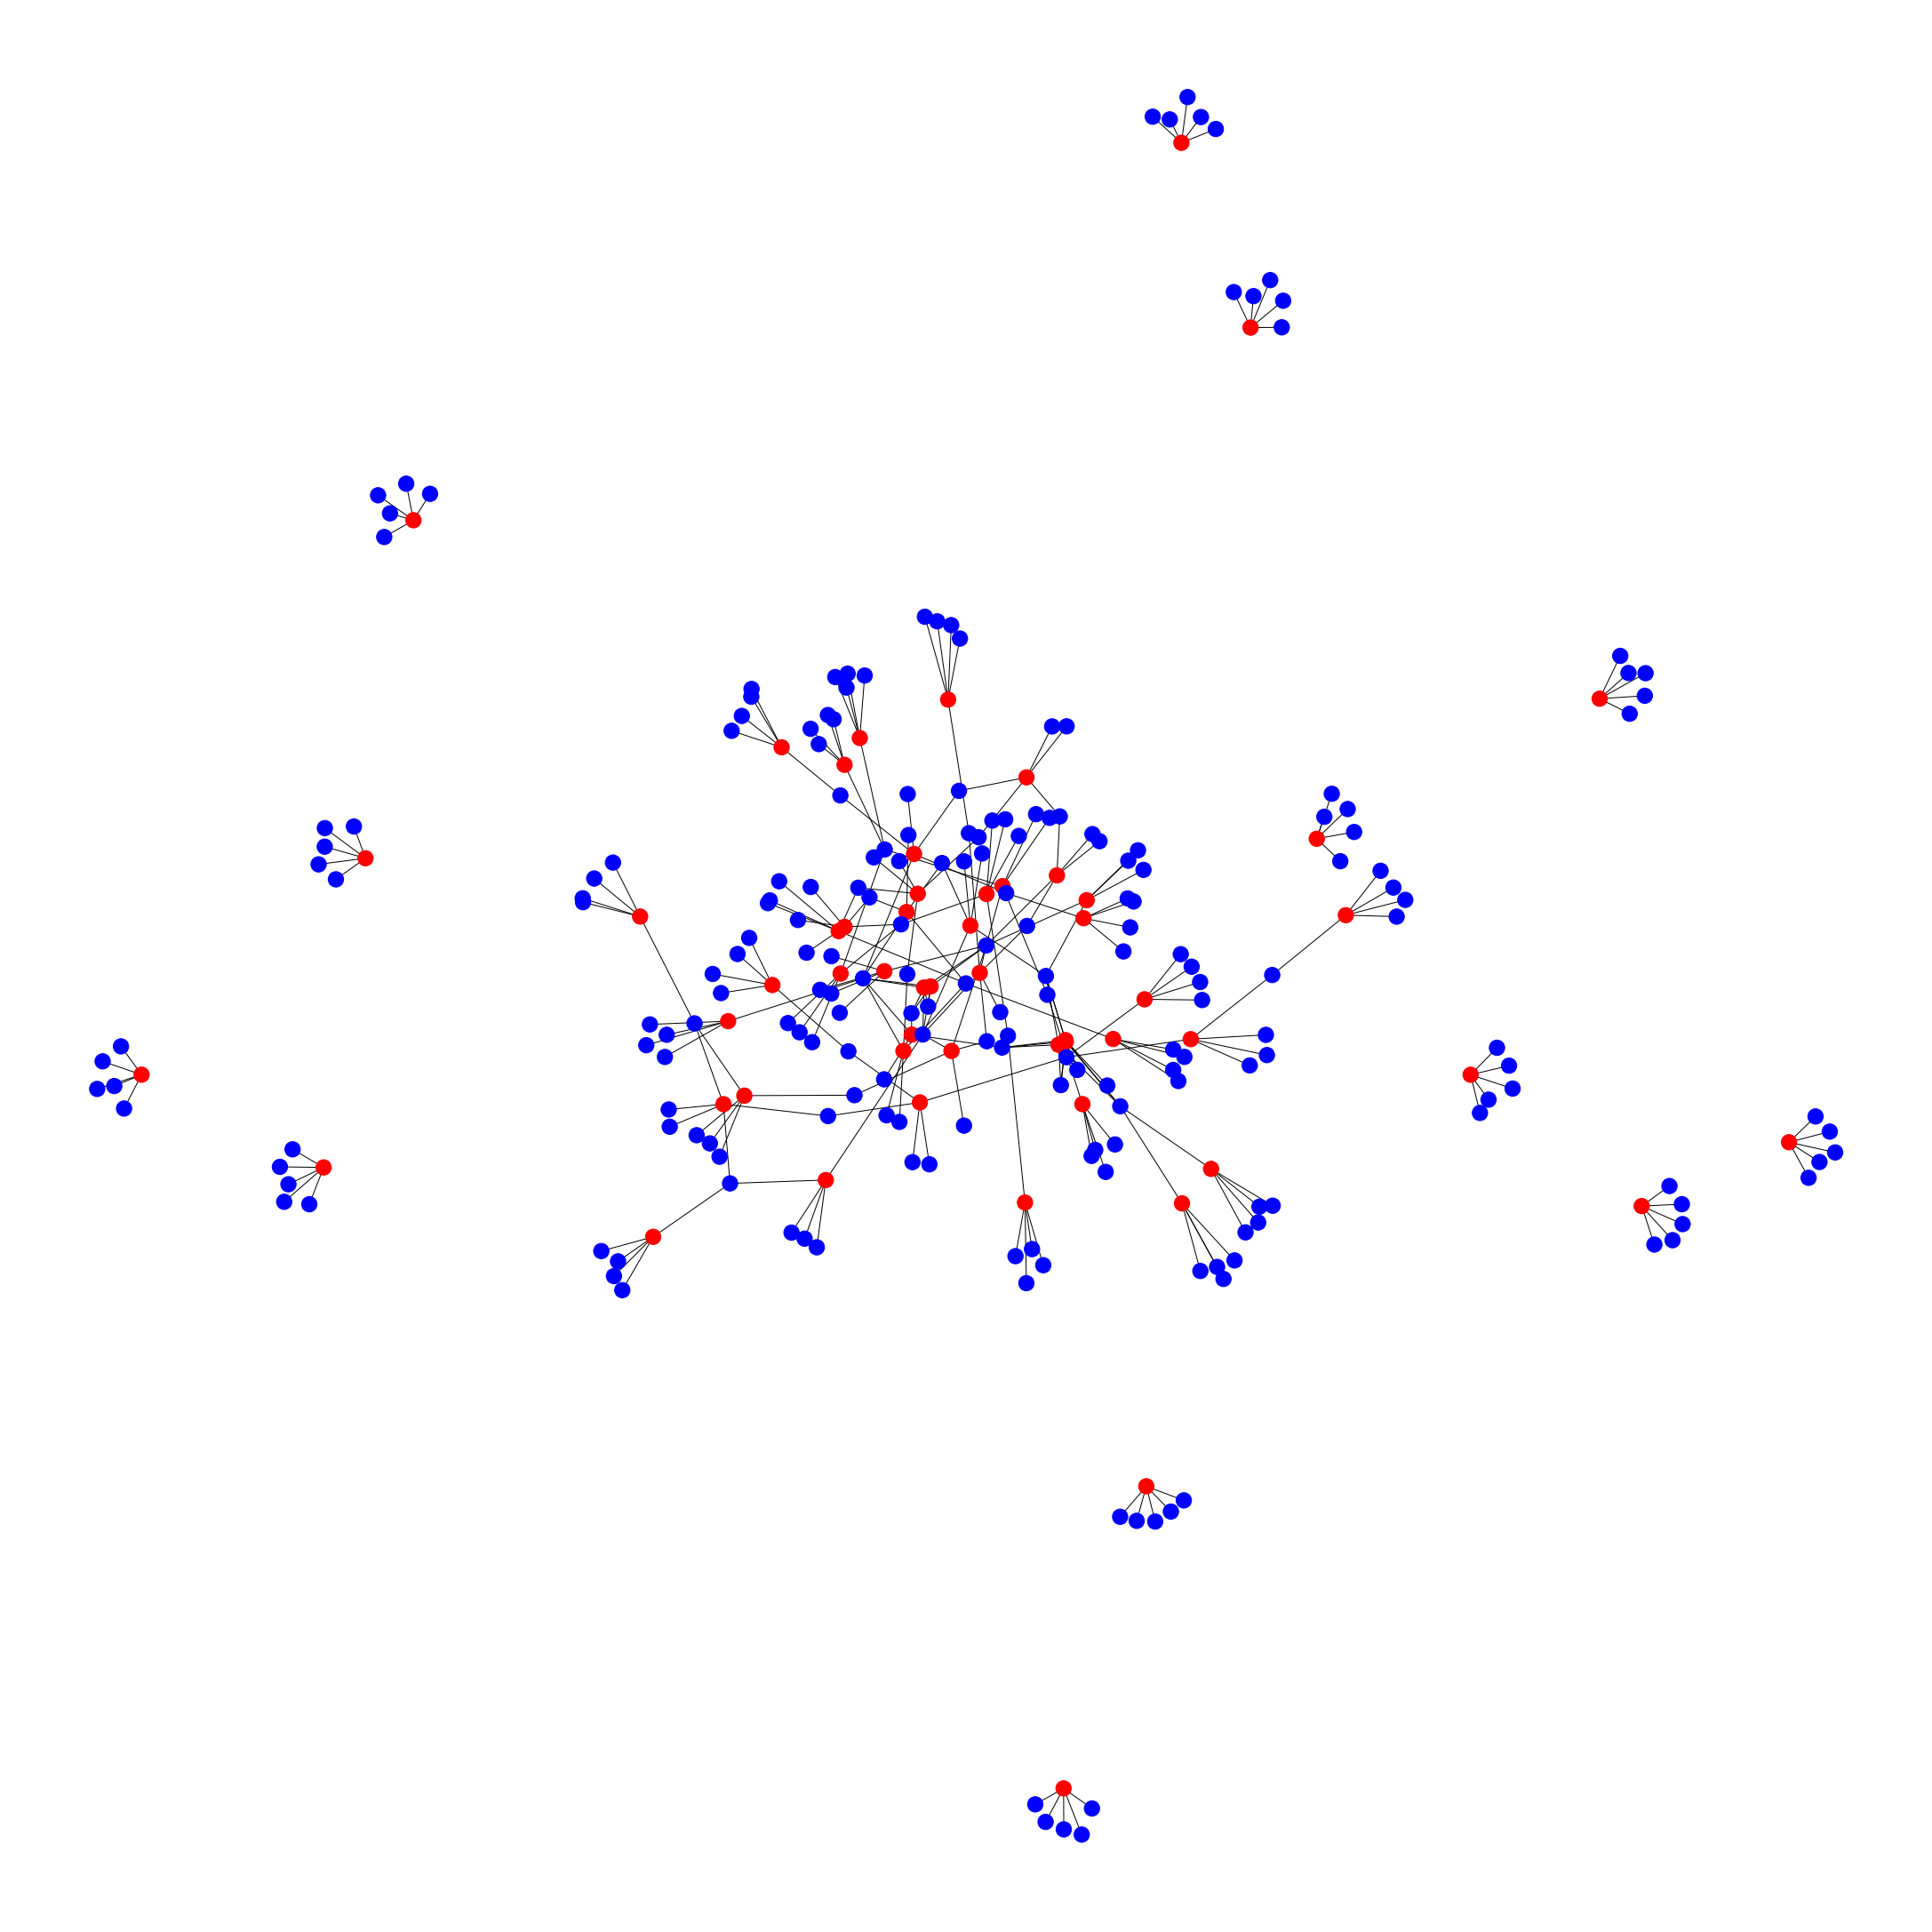

In [49]:
# node-link diagram differentiating the two types of nodes

color_map = []
for node in B:
    if "https://" in node:
        color_map.append('blue')
    else:
        color_map.append('red')

#pos = nx.spring_layout(B, k=0.20, iterations=100)

pos = nx.spring_layout(B, k=0.3*1/np.sqrt(len(B.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))

nx.draw(B, pos=pos, node_color=color_map)  
plt.show()

In [50]:
# How many components are there in this graph?
len([len(c) for c in sorted(nx.connected_components(B), key=len, reverse=True)])

14

In [51]:
# Extracting the largest component
main_component = max(nx.connected_components(B), key=len)
main_component

{'Bernier, Clement',
 'Brandl, Florian Lukas',
 'Chai, Kyuwook ',
 'Chang, Jaewon',
 'Cho, Minsoo',
 'Chun, Ye Ji',
 'Chung, Chaeyoung',
 'Chung, Jiwan',
 'Hwang, Doohyun',
 'Jeong, Jinseo',
 'Ji, Seungyeong',
 'Jo, Iksu',
 'Kang, Dong Sig',
 'Kim, Haesung',
 'Kim, Jongwon',
 'Kim, Myungdong',
 'Kim, Tae Kyoung',
 'Kim, Yeonsoo',
 'Kwack, Taeye',
 'Lau, Oi Yee',
 'Ledwon, Dennis Michael',
 'Lee, Inhoe',
 'Lee, Jaeyong',
 'Lee, Jewoo',
 'Lee, Jueon',
 'Lee, Kyuho',
 'Lee, Seungju',
 'Lee, Sumin',
 'Lim, Chan Song',
 'Logghe, Jubeline Jacqueline L',
 'Nguyen, Tuan Nghia',
 'Park, Jinwon',
 'Park, Jisoo',
 'Park, Ju Yeon',
 'Park, Jung Ho',
 'Seok, Ji Heon',
 'Shetty, Marguerite Indrayani',
 'Stepanov, Ilya',
 'Suard, Steve',
 'Urm, Jae Jung',
 'Xu, Shu',
 'Yang, Jaeyeong',
 'Yoo, Jaekyun',
 'https://www.kaggle.com//nickhould/craft-cans',
 'https://www.kaggle.com/Cornell-University/arxiv',
 'https://www.kaggle.com/aaron7sun/stocknews',
 'https://www.kaggle.com/abhikjha/imdb-wiki-faces-dat

In [52]:
# Names of people who do not belong to the main component
connected_components = [c for c in sorted(nx.connected_components(B), key=len, reverse=True)]
del connected_components[0]

for connected_component in connected_components:
    for name in connected_component:
        if "https://" not in name:
            print(name)

Kim, Jaehee
Kim, Junmo
Ham, Yoonhee
Koller, Pia
Shin, Yoon Jae
Bansal, Parth
Sluimer, Jasper
Kim, Chongmin
Kim, Hyunwoo
Oh, Sewon
Na, Doori
Doret, Norman
Buisson, Antoine


In [112]:
# Convert the main component into two unipartite graphs
S = [B.subgraph(c).copy() for c in nx.connected_components(B)]

person_nodes, dataset_nodes = bipartite.sets(S[0])


# S = nx.Graph()
# # Add nodes with the node attribute "bipartite"
# S.add_nodes_from(person_nodes, bipartite='Person')
# S.add_nodes_from(dataset_nodes, bipartite='Dataset')


#print(person_nodes)
#print(dataset_nodes)

In [113]:
weighted_person_graph = bipartite.weighted_projected_graph(B, person_nodes)
#list(weighted_person_graph.edges(data=True))
weighted_dataset_graph = bipartite.weighted_projected_graph(B, dataset_nodes)

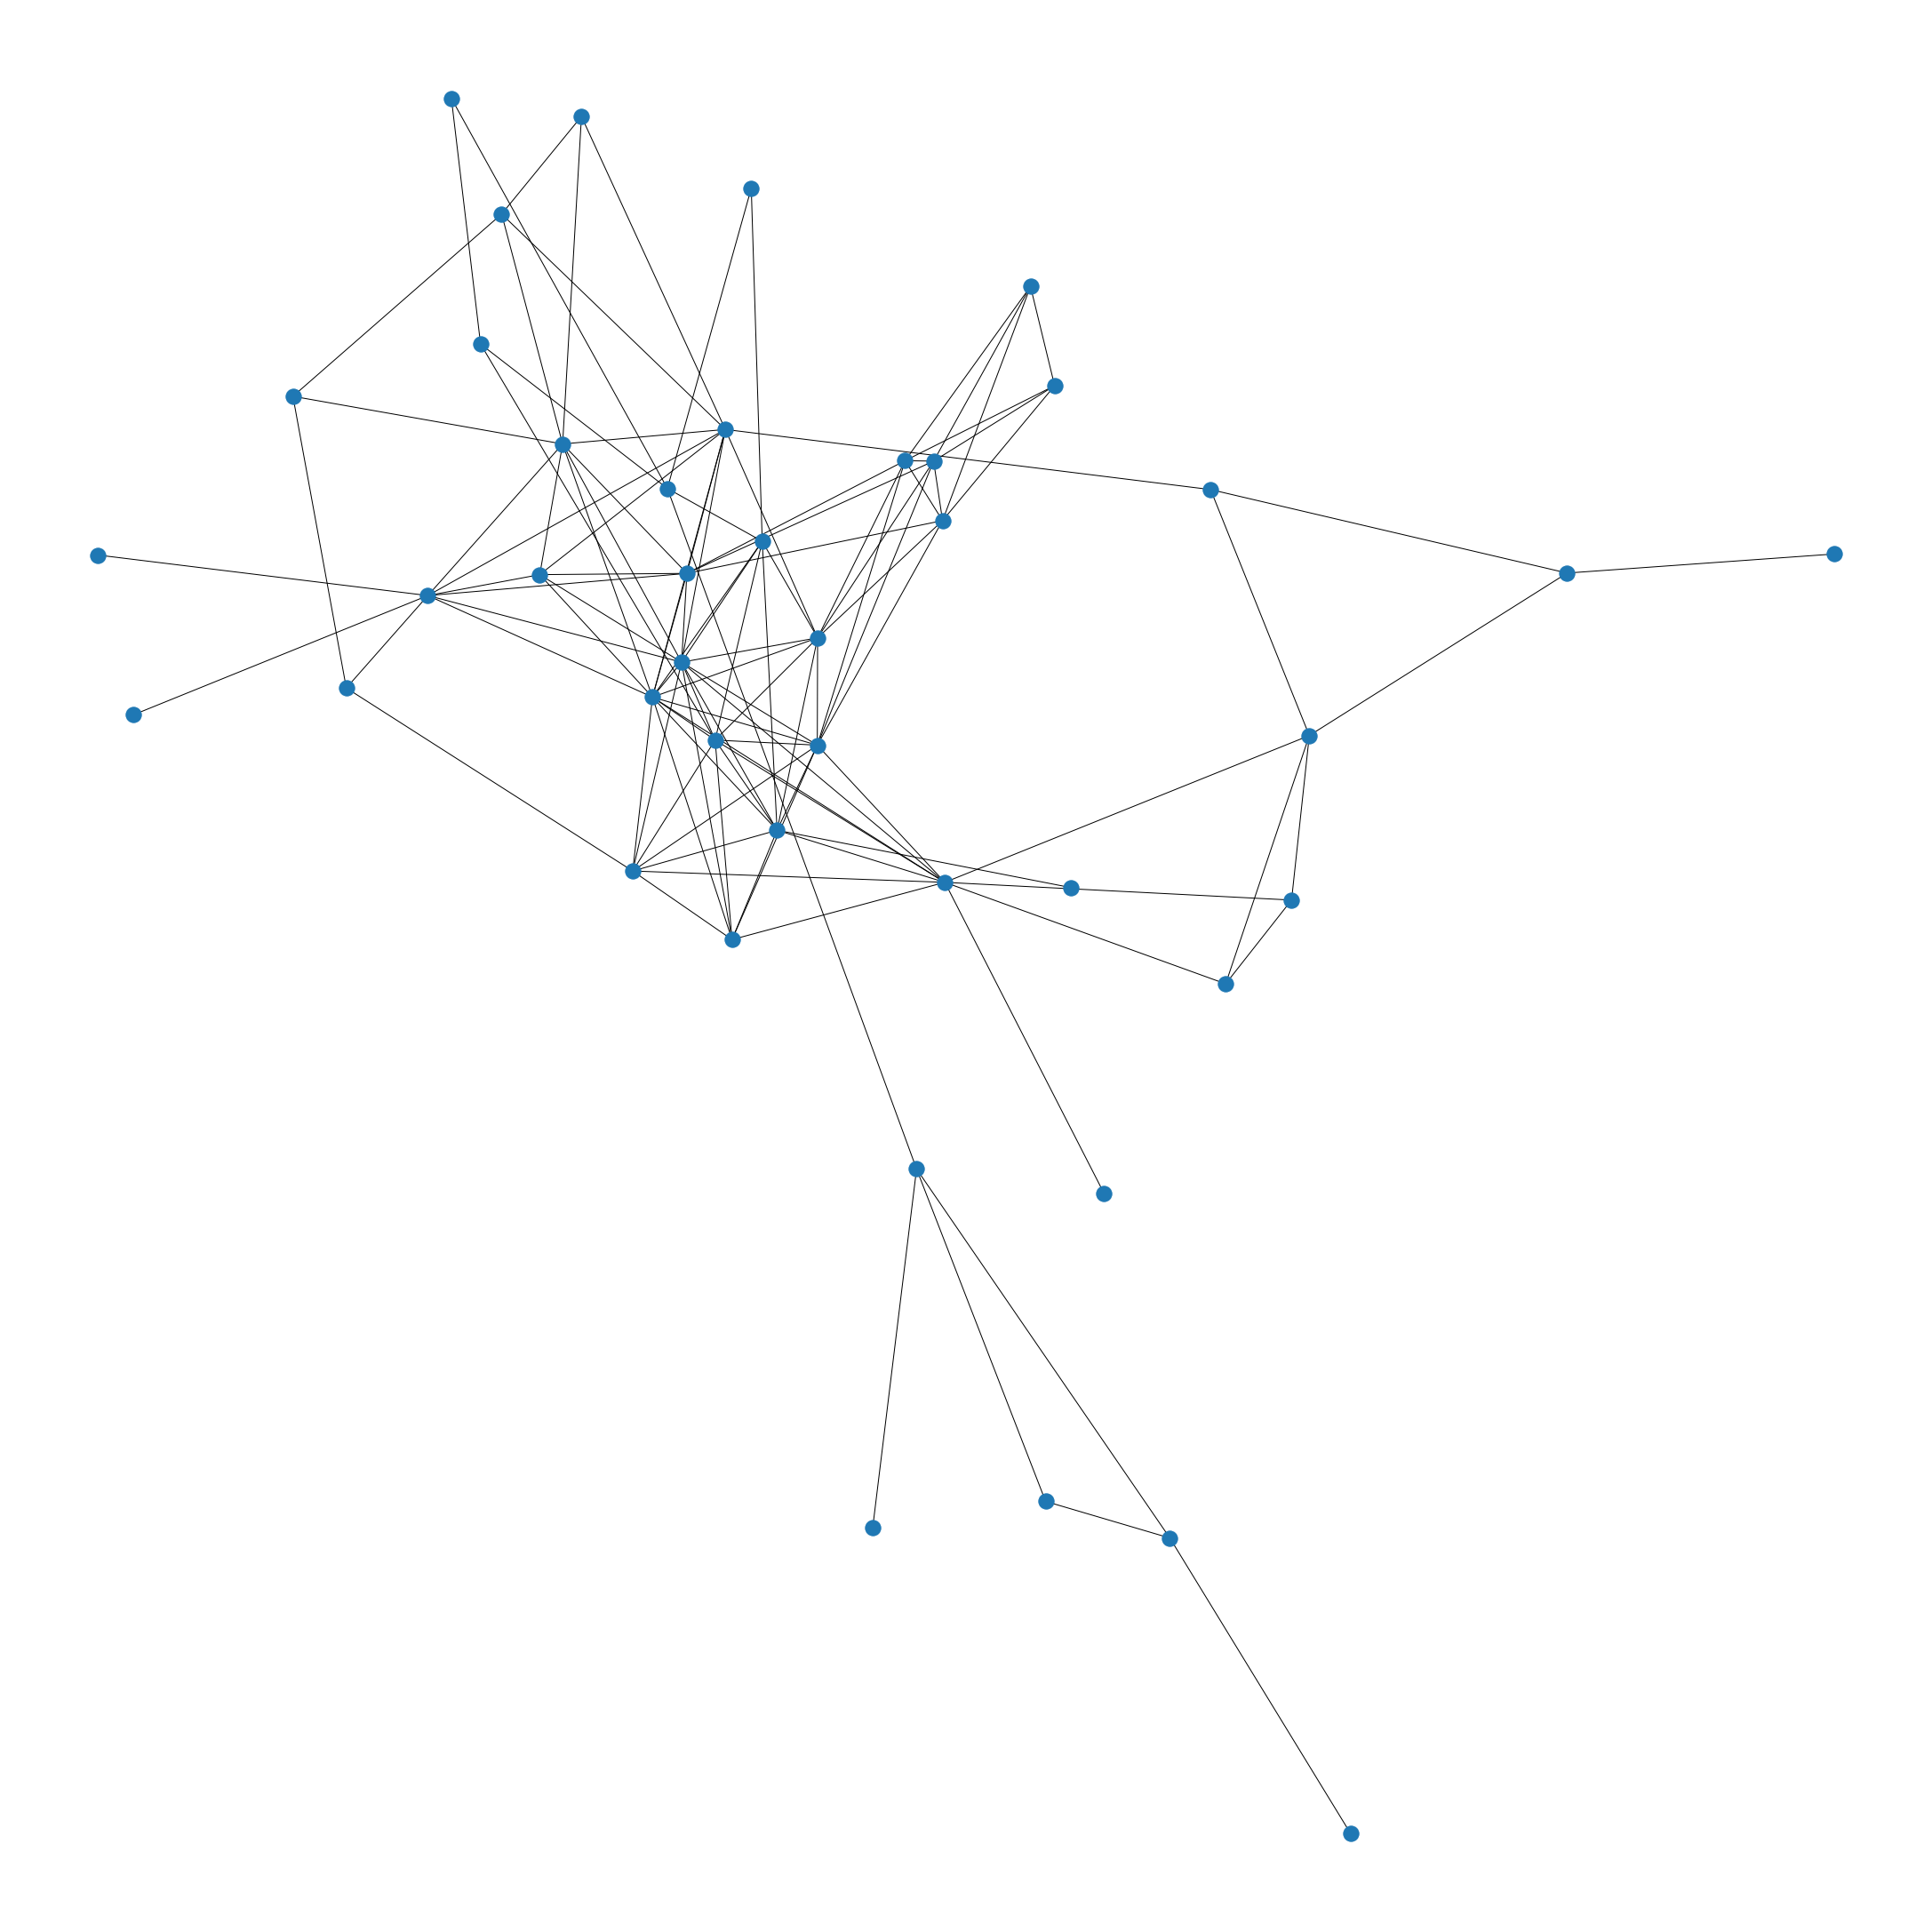

In [114]:
# Visualize both persons graph and datasets graph using node-link diagrams
# Persons graph

pos = nx.spring_layout(weighted_person_graph, k=0.3*1/np.sqrt(len(weighted_person_graph.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))

nx.draw(weighted_person_graph, pos=pos)  
plt.show()

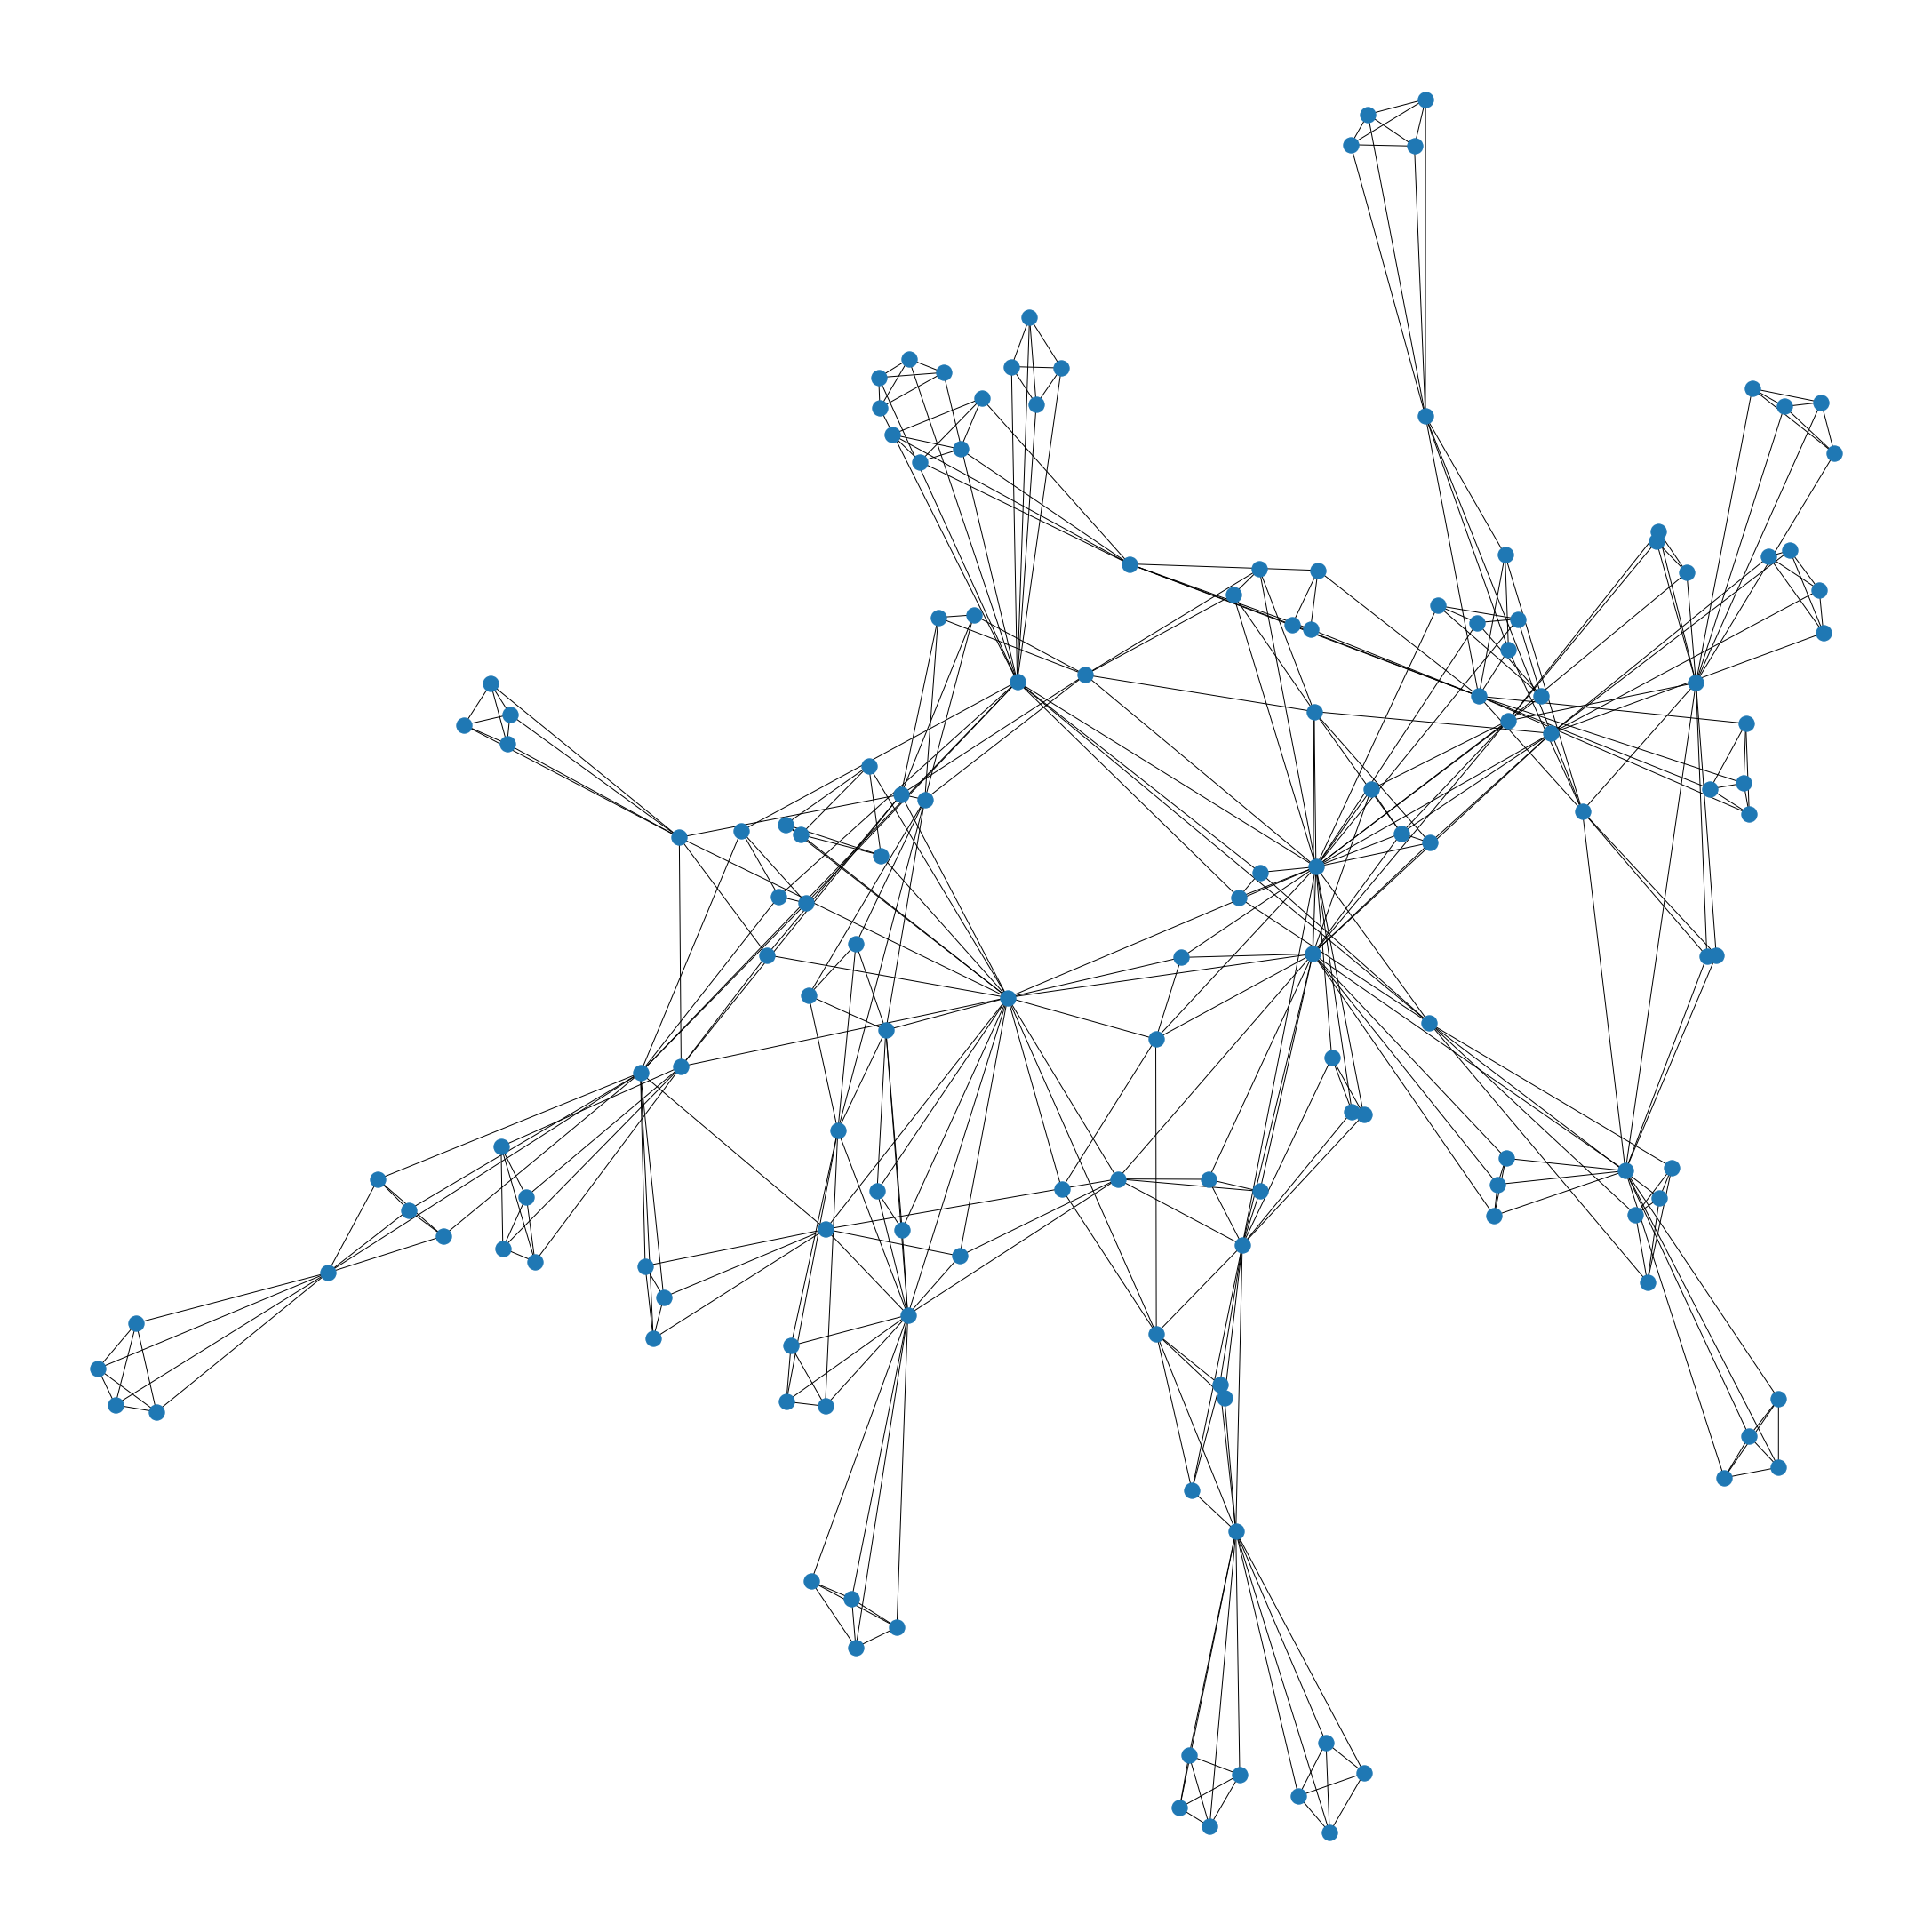

In [115]:
# Visualize both persons graph and datasets graph using node-link diagrams
# Dataset graph
pos = nx.spring_layout(weighted_dataset_graph, k=0.3*1/np.sqrt(len(weighted_dataset_graph.nodes())), iterations=20)
plt.figure(3, figsize=(30, 30))

nx.draw(weighted_dataset_graph, pos=pos)  
plt.show()

In [142]:
# Compute closeness centralities for all nodes in the persons graph
closeness = nx.closeness_centrality(weighted_person_graph)
closeness

{'Kim, Myungdong': 0.4883720930232558,
 'Lee, Sumin': 0.3684210526315789,
 'Logghe, Jubeline Jacqueline L': 0.32558139534883723,
 'Jo, Iksu': 0.2131979695431472,
 'Lee, Inhoe': 0.4,
 'Cho, Minsoo': 0.42,
 'Xu, Shu': 0.2876712328767123,
 'Ledwon, Dennis Michael': 0.27631578947368424,
 'Hwang, Doohyun': 0.3157894736842105,
 'Lee, Jueon': 0.21212121212121213,
 'Kim, Yeonsoo': 0.2641509433962264,
 'Chung, Jiwan': 0.3888888888888889,
 'Lau, Oi Yee': 0.3111111111111111,
 'Ji, Seungyeong': 0.4883720930232558,
 'Suard, Steve': 0.32558139534883723,
 'Park, Ju Yeon': 0.4,
 'Chung, Chaeyoung': 0.30656934306569344,
 'Urm, Jae Jung': 0.39622641509433965,
 'Lee, Jaeyong': 0.2876712328767123,
 'Lee, Seungju': 0.42424242424242425,
 'Kim, Haesung': 0.4375,
 'Kwack, Taeye': 0.2131979695431472,
 'Bernier, Clement': 0.2727272727272727,
 'Seok, Ji Heon': 0.2692307692307692,
 'Park, Jung Ho': 0.3684210526315789,
 'Kim, Jongwon': 0.27631578947368424,
 'Yang, Jaeyeong': 0.3111111111111111,
 'Shetty, Marguerit

In [136]:
# Compute betweenness centralities for all nodes in the persons graph
betweenness = nx.betweenness_centrality(weighted_person_graph, normalized = True, endpoints = False)
betweenness

{'Kim, Myungdong': 0.1411841159227919,
 'Lee, Sumin': 0.029849012775842034,
 'Logghe, Jubeline Jacqueline L': 0.05533709418726842,
 'Jo, Iksu': 0.047619047619047616,
 'Lee, Inhoe': 0.06660859465737516,
 'Cho, Minsoo': 0.0665795586527294,
 'Xu, Shu': 0.0,
 'Ledwon, Dennis Michael': 0.0,
 'Hwang, Doohyun': 0.0,
 'Lee, Jueon': 0.0,
 'Kim, Yeonsoo': 0.1800232288037166,
 'Chung, Jiwan': 0.0,
 'Lau, Oi Yee': 0.0,
 'Ji, Seungyeong': 0.1411841159227919,
 'Suard, Steve': 0.008633372048006195,
 'Park, Ju Yeon': 0.10831121066312702,
 'Chung, Chaeyoung': 0.0,
 'Urm, Jae Jung': 0.0,
 'Lee, Jaeyong': 0.0,
 'Lee, Seungju': 0.20109783750898733,
 'Kim, Haesung': 0.10020186936563241,
 'Kwack, Taeye': 0.0,
 'Bernier, Clement': 0.0,
 'Seok, Ji Heon': 0.047619047619047616,
 'Park, Jung Ho': 0.029849012775842034,
 'Kim, Jongwon': 0.0,
 'Yang, Jaeyeong': 0.0,
 'Shetty, Marguerite Indrayani': 0.09850810242796308,
 'Nguyen, Tuan Nghia': 0.0,
 'Lee, Kyuho': 0.003716608594657375,
 'Yoo, Jaekyun': 0.1322451744925

In [145]:
# Compute the correlation coefficient between the two centrality measures
# r = np.corrcoef(closeness, betweenness)
# r

TypeError: unsupported operand type(s) for /: 'dict' and 'int'